# Ridge plot

In this notebook, I'll visualize $\mathcal{W}(R,t)$ using `matplotlib` ridge plots.

## Imports

In [18]:
import tables

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import matplotlib.ticker as ticker

## Load in data

In [19]:
alpha = 0.01
cs = 0.02
Mp = 0.003
a = 1

In [20]:
file_path = "Data/W_tseries/zhu-inspired/alpha=" + str(alpha) + ",h=" + str(cs) + \
                    ",Mp=" + str(Mp) + ",a=" + str(a) + ".h5"
temp = pd.read_hdf(file_path, key='W_tseries', mode='r')

W_tseries = temp.copy(deep=True)

In [21]:
W_tseries

,0.50,0.65,0.80,0.95,1.10,1.25,1.40,1.55,1.70,1.85,...,2.15,2.30,2.45,2.60,2.75,2.90,3.05,3.20,3.35,3.50
0.0,1.000000e-01-6.513876e- 04j,1.000000e-01-1.527808e- 03j,1.000000e-01-4.486307e- 03j,1.000000e-01-1.879692e- 02j,1.000000e-01-1.163168e- 02j,1.000000e-01-3.093822e- 03j,1.000000e-01-1.256267e- 03j,1.000000e-01-6.470788e- 04j,1.000000e-01-3.820499e- 04j,1.000000e-01-2.462061e- 04j,...,0.100000-0.000121j,0.100000-0.000090j,0.100000-0.000068j,0.100000-0.000053j,0.100000-0.000042j,0.100000-0.000034j,0.100000-0.000028j,0.100000-0.000023j,0.100000-0.000019j,0.100000-0.000016j
5.0,9.999600e-02-1.397318e- 03j,9.997848e-02-3.282708e- 03j,9.983242e-02-1.021190e- 02j,9.638667e-02-3.524046e- 02j,9.867772e-02-2.310634e- 02j,9.991677e-02-6.930061e- 03j,9.998504e-02-2.648652e- 03j,9.999593e-02-1.332303e- 03j,9.999857e-02-7.784234e- 04j,9.999940e-02-4.988750e- 04j,...,0.100000-0.000243j,0.100000-0.000180j,0.100000-0.000137j,0.100000-0.000107j,0.100000-0.000085j,0.100000-0.000069j,0.100000-0.000056j,0.100000-0.000046j,0.100000-0.000039j,0.100000-0.000033j
10.0,9.998661e-02-2.336078e- 03j,9.992719e-02-5.572229e- 03j,9.923242e-02-1.784056e- 02j,8.987143e-02-4.706716e- 02j,9.607092e-02-3.396484e- 02j,9.965633e-02-1.205195e- 02j,9.995135e-02-4.364650e- 03j,9.998720e-02-2.100843e- 03j,9.999556e-02-1.204820e- 03j,9.999816e-02-7.648325e- 04j,...,0.100000-0.000370j,0.100000-0.000273j,0.100000-0.000208j,0.100000-0.000162j,0.100000-0.000128j,0.100000-0.000103j,0.100000-0.000085j,0.100000-0.000070j,0.100000-0.000059j,0.100000-0.000050j
15.0,9.996827e-02-3.591878e- 03j,9.980212e-02-8.794750e- 03j,9.775989e-02-2.715399e- 02j,8.186023e-02-5.335149e- 02j,9.225818e-02-4.354063e- 02j,9.904193e-02-1.866464e- 02j,9.988158e-02-6.665304e- 03j,9.997229e-02-3.017226e- 03j,9.999068e-02-1.680568e- 03j,9.999620e-02-1.051867e- 03j,...,0.099999-0.000502j,0.100000-0.000370j,0.100000-0.000280j,0.100000-0.000218j,0.100000-0.000172j,0.100000-0.000139j,0.100000-0.000113j,0.100000-0.000094j,0.100000-0.000079j,0.100000-0.000069j
20.0,9.993120e-02-5.341552e- 03j,9.948789e-02-1.333696e- 02j,9.502202e-02-3.709986e- 02j,7.400404e-02-5.464596e- 02j,8.741912e-02-5.105744e- 02j,9.785687e-02-2.655845e- 02j,9.972988e-02-9.854826e- 03j,9.994725e-02-4.181560e- 03j,9.998331e-02-2.232269e- 03j,9.999336e-02-1.369540e- 03j,...,0.099998-0.000642j,0.099999-0.000470j,0.100000-0.000356j,0.100000-0.000276j,0.100000-0.000218j,0.100000-0.000175j,0.100000-0.000143j,0.100000-0.000118j,0.100000-0.000099j,0.100000-0.000088j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975.0,-1.920099e-07+4.611466e- 07j,-1.881642e-07+4.603719e- 07j,-1.862177e-07+4.579540e- 07j,-1.999745e-07+4.627489e- 07j,-3.332794e-07+6.329918e- 07j,-4.351033e-07+7.019584e- 07j,-5.061820e-07+7.249869e- 07j,-5.615472e-07+7.363682e- 07j,-6.065077e-07+7.444806e- 07j,-6.437105e-07+7.517644e- 07j,...,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j
19980.0,-1.851980e-07+4.623877e- 07j,-1.813741e-07+4.615633e- 07j,-1.794661e-07+4.591262e- 07j,-1.931175e-07+4.640933e- 07j,-3.237236e-07+6.356400e- 07j,-4.243133e-07+7.057825e- 07j,-4.948706e-07+7.297058e- 07j,-5.499185e-07+7.418035e- 07j,-5.946365e-07+7.505010e- 07j,-6.316310e-07+7.582672e- 07j,...,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j
19985.0,-1.783893e-07+4.635330e- 07j,-1.745879e-07+4.626592e- 07j,-1.727186e-07+4.602035e- 07j,-1.862624e-07+4.653409e- 07j,-3.141601e-07+6.381510e- 07j,-4.135032e-07+7.094492e- 07j,-4.835286e-07+7.342576e- 07j,-5.382503e-07+7.470653e- 07j,-5.827188e-07+7.563429e- 07j,-6.194990e-07+7.645873e- 07j,...,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.000001+0.000001j,-0.00000

In [22]:
## access a row at t=0
#W_tseries.loc[0]
## access a row at index 9
#W_tseries.iloc[9]
## access a column at R=0.5
#W_tseries[0.5].values

# get the t domain
W_tseries.index

Index([    0.0,     5.0,    10.0,    15.0,    20.0,    25.0,    30.0,    35.0,
          40.0,    45.0,
       ...
       19950.0, 19955.0, 19960.0, 19965.0, 19970.0, 19975.0, 19980.0, 19985.0,
       19990.0, 19995.0],
      dtype='float64', length=4000)

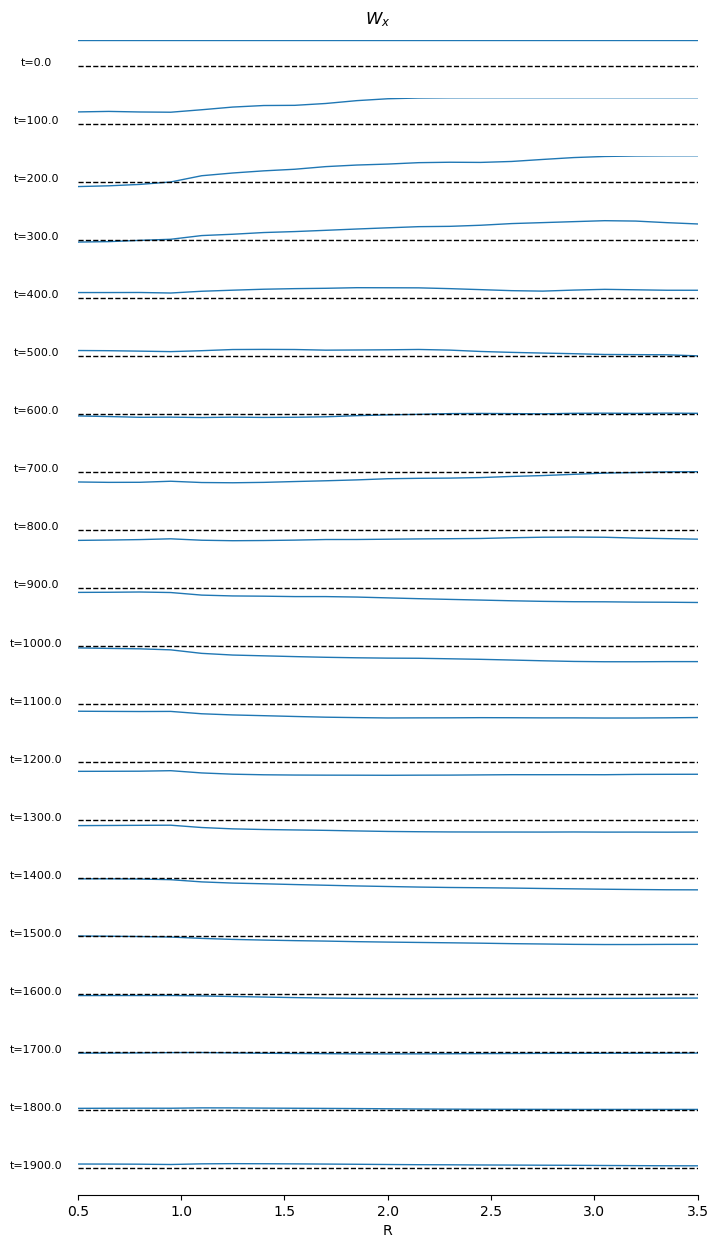

In [73]:
#plt.style.use('dark_background')


R_axis = W_tseries.columns
t_axis = W_tseries.index[0:400:20]

gs = (grid_spec.GridSpec(len(t_axis), 1))
fig = plt.figure(figsize=(8,15))

# empty list of axis objects
ax_objs = []

i = 0
for t in t_axis:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1])) # oldest snapshots at top

    # make plot
    W_vals = W_tseries.loc[t].values.real
    ax_objs[-1].plot(R_axis, W_vals, lw=1)
    ax_objs[-1].hlines(y=0, xmin=R_axis[0], xmax=R_axis[-1],\
                        lw=1, color='black', ls='--')

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0.5, 3.5)
    ax_objs[-1].set_ylim(-.1,.1)

    # make background transparent
    rect = ax_objs[-1].patch
    #rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].axis('off')
    ax_objs[-1].set_yticklabels([])
    #ax_objs[-1].set_ylabel('')

    # label timepoint
    ax_objs[-1].text(.3,0,"t=" + str(t),fontsize=8,ha="center")

    i += 1

ax_objs[-1].axis('on')
ax_objs[-1].spines['top'].set_visible(False)
ax_objs[-1].spines['right'].set_visible(False)
ax_objs[-1].spines['bottom'].set_visible(True)
ax_objs[-1].spines['left'].set_visible(False)
ax_objs[-1].get_yaxis().set_visible(False)

ax_objs[-1].set_xlabel('R')
ax_objs[-1].set_ylabel('Tilt')
gs.update(hspace=.1)
# plt.ylabel("Tilt")
plt.suptitle(r"$W_x$", y=.9)

save_figs = True
if save_figs:
    plt.savefig("Figures/ridge-plot-alpha=" + str(alpha) + ",h=" + str(cs) + \
                    ",Mp=" + str(Mp) + ",a=" + str(a) + ".png")

#plt.tight_layout()
plt.show()